# Question 15

Text(0.5, 1.0, 'behaviour of Gamma integrand')

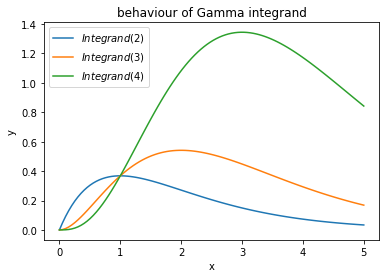

In [1]:
#part a
import numpy as np
import math
import matplotlib.pyplot as plt

def gamma(n,x):
    return x**(n-1)*math.exp(-x)

gamma_2=[]
gamma_3=[]
gamma_4=[]

x=np.linspace(0,5,100)

for i in range(0,100):
    gamma_2.append(gamma(2,x[i]))
    gamma_3.append(gamma(3,x[i]))
    gamma_4.append(gamma(4,x[i]))
    
plt.plot(x,gamma_2, label='$Integrand(2)$')
plt.plot(x,gamma_3, label='$Integrand(3)$')
plt.plot(x,gamma_4, label='$Integrand(4)$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('behaviour of Gamma integrand')

$\textbf{Part B}$

In this case we differentiate the integrand. 
$$\frac{d}{dx} x^{a-1}e^{-x}= (a-1)x^{a-2}e^{-x} - x^{a-1}e^{-x}$$
for maxima it should be 0:
$$(a-1)x^{a-2}e^{-x} - x^{a-1}e^{-x}=0 \implies (a-1) - x =0$$
if we cancel, $x^{a-2}e^{-x}$ from both sides, given x is not exactly 0, which is also evident from the solution which gives: $x=a-1$, until $a=1$ which basically makes the integrand simply $e^{-x}$, and this analysis becomes unnecessary itself.

$\textbf{Part C}$

Now, we have: 
$$\frac{x}{x+c}=\frac{1}{2} \implies 2x =x +c  \implies c=x$$
The maxima occurs at $x=a-1$, which meand we have to set $c=a-1$, diffrernt choices of $c$ for different choices of $a$.

$\textbf{Part D}$

We represent the expression as:
$$x^{a-1}e^{-x}= e^{(a-1)lnx}e^{-x}=e^{[(a-1)lnx-x]}$$

This works better because if we first calculate $(a-1)lnx -x$, then the chances of numerical errors are lesser, because of the somewhat similar behavior of lnx and x. It basically helps to nullify the increasing effect of lnx and decreasing effect of -x in a single computation without running into the problem of calculating something big and something small at different times and then adding these to get the result.

$\textbf{Part E}$

We subtitute $y=\frac{x}{x+a-1}$ which when reversed looks like: $x=\frac{(a-1)y}{1-y}$, We substitute this into the integration equation to obtain:
$$\Gamma(a)= (a-1)^{a}\int_0^1\frac{e^{\frac{(1-a)y}{1-y}}}{(1-y)^{1+a}} dy$$
We clearly see that the denominator goes to 0 in the vicinity of y=1, but the numerator goes to 0 faster(exponentially)than the denominator(geometrically). So, we can avoid integrating till 1 altogether.

The approach we take is to integrate from 0 to 1/2, then 1/2 to 3/4, and so on. For the ith integral we choose, the lower limit to be $1-2^{1-i}$ and the upper limit is $1-2^{-i}$. We keep doing it until the jth integral is less than a certain tolerance value, say 1e-6.

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f(a,y):
    t_1=(a-1)*math.log((y*(a-1))/(1-y))
    t_2=-((a-1)*y)/(1-y)
    t_3=-2*math.log((1-y))
    return math.exp(t_1+t_2+t_3)

#we choose gaussian quadrature as it takes lesser number of iterations, for N=100 points.
    
    
from numpy import ones,copy,cos,tan,pi,linspace


def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w


def int_gamma(a, low, high, N):
    x,w=gaussxwab(N, low, high)
    val=0
    for i in range(N):
        val+=(w[i])*(f(a, x[i]))
    return val*(a-1)

def Gamma(a, tolerance, N):
    value=0
    low=1e-6
    high=1/2
    i=1
    while(int_gamma(a, low, high, N)>tolerance):
        value+=int_gamma(a, low, high, N)
        i+=1
        low=high
        high=1-2**(-i)  
    return value

N=100
tolerance =1e-6

#part b and c combined

print('Gamma(3/2)is:', Gamma(3/2, tolerance, N))
print('Gamma(3)is:', Gamma(3, tolerance, N))
print('Gamma(6)is:', Gamma(6, tolerance, N))
print('Gamma(10)is:', Gamma(10, tolerance, N))
    


    


Gamma(3/2)is: 0.8862261836929437
Gamma(3)is: 1.9999999999099793
Gamma(6)is: 119.99999996156383
Gamma(10)is: 362880.0
